# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [18]:
# TODO: Import all necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR,SVC
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB


# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [2]:
# TODO: Load regression dataset
df = pd.read_csv("insurance.csv")
print("DataFrame Shape: ",df.shape)
print("All Column Names: ",df.columns.tolist())
df.head(10)
features = df.columns[:-1].tolist()
target = df.columns[-1]
print("Feature names: ",features)
print("Target: ",target)
X = df[features]
Y = df[target]
df.head(5)


DataFrame Shape:  (1338, 7)
All Column Names:  ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Feature names:  ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
Target:  charges


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


This is a classical Medical Expense Dataset which has a total of 7 columns and 1338 rows. Among the 7 columns 6 of them are features and the last one is the target column which defines the charges of the patient. The six features are Age,Sex,Bmi,Childrens(No. of Children The patient has),Smoker(Smoking status of the patient),region.

## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


Categorical Features:  ['sex', 'smoker', 'region']
Numerical Features:  ['age', 'bmi', 'children']


'Descriptive Statistics: '

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


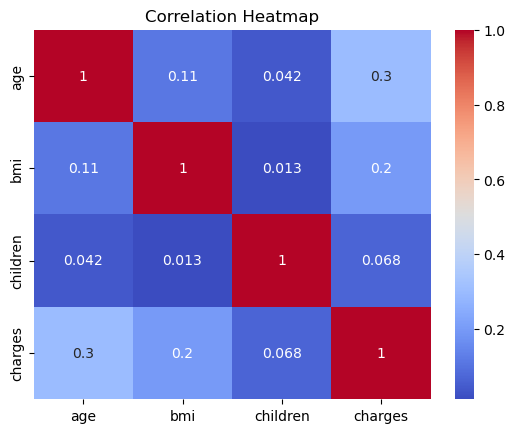

In [3]:
# TODO: Perform EDA
cat_features = X.select_dtypes(include="object").columns.tolist()
num_features = X.select_dtypes(exclude="object").columns.tolist()
print("Categorical Features: ", cat_features)
print("Numerical Features: ", num_features)
display("Descriptive Statistics: ", df.describe().T)
corr = df.corr(numeric_only=True)
sns.heatmap(corr,annot= True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

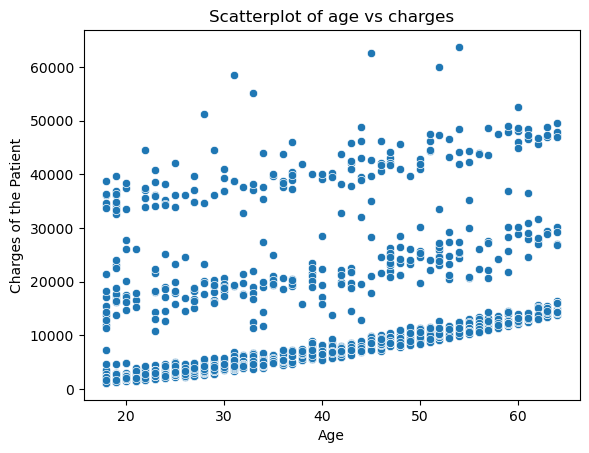

In [4]:
sns.scatterplot(x = X.age,y= Y)
plt.xlabel("Age")
plt.ylabel("Charges of the Patient")
plt.title("Scatterplot of age vs charges")
plt.show()

The Statistical description shows that there are no missing values in the dataset. The HeatMap Shows that the target variable is strongly correlated with the age of the patient with a correlation of 30%, later it is 20% correlated with the bmi of the patient, and 6.8% correlated with the number of children of the patient.<br>
Finally in the Scatterplot of Age vs Charges, it is clear that the charges of the patient increases with the age of the patient, while it has some outliers as well

## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [5]:
# TODO: Prepare features
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
# pipe = Pipeline([
#     ("ohe",)
# ])
print(X_train.shape)
print(X_test.shape)
transformer = ColumnTransformer([
("ohe",OneHotEncoder(handle_unknown="ignore",sparse_output=False),cat_features),
 ("scaler",StandardScaler(),num_features)
])

(1070, 6)
(268, 6)


## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [6]:
# TODO: Multiple Linear Regression
lin_reg = LinearRegression()
model = Pipeline([("transformer", transformer), ("ml_model", lin_reg)])
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

def eval_mat(y_train,y_train_pred,y_test,y_test_pred):
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_score_train = r2_score(y_train, y_train_pred)
    r2_score_test = r2_score(y_test, y_test_pred)
    print("Mean Absolute Error on train set: ", mae_train)
    print("Mean Absolute Error on test set: ", mae_test)
    print("Root Mean Squared Erron on train set: ", rmse_train)
    print("Root Mean Squared Erron on test set: ", rmse_test)
    print("R^2 Score on train set: ", r2_score_train)
    print("R^2 Score on test set: ", r2_score_test)

eval_mat(y_train,y_train_pred,y_test,y_test_pred)

Mean Absolute Error on train set:  4208.234572492225
Mean Absolute Error on test set:  4181.1944737536505
Root Mean Squared Erron on train set:  6105.545160099847
Root Mean Squared Erron on test set:  5796.284659276274
R^2 Score on train set:  0.7417255854683333
R^2 Score on test set:  0.7835929767120722


## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [7]:
# TODO: Polynomial Regression
num_pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("polynomial_maker", PolynomialFeatures(degree=2, include_bias=False)),
    ]
)
cat_pipe = Pipeline(
    [("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))]
)
ptransformer = ColumnTransformer(
    [
        ("numerical pipe", num_pipe, num_features),
        ("categorical pipe", cat_pipe, cat_features),
    ]
)
poly_model = Pipeline(
    [
        ("ptransformer", ptransformer),
        ("ml_model", LinearRegression()),
    ]
)
poly_model.fit(X_train, y_train)
py_train_pred = poly_model.predict(X_train)
py_test_pred = poly_model.predict(X_test)

eval_mat(y_train, py_train_pred, y_test, py_test_pred)

Mean Absolute Error on train set:  4264.443204491232
Mean Absolute Error on test set:  4254.274826829179
Root Mean Squared Erron on train set:  6030.76654499923
Root Mean Squared Erron on test set:  5841.280185905571
R^2 Score on train set:  0.7480133552172077
R^2 Score on test set:  0.7802200772760515


For This Dataset, The Multiple linear Regresion and polynomial regression doesn't show a much difference in r^2 score, Where both of them shows around 0.78 R^2 score on test Data and nearly 0.75 score on train data.<br>
In mean absolute error and root mean absolute error, the difference is also negligible.<br>
Hence using Multiple Linear regression for this dataset is enough

## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [8]:
# TODO: Support Vector Regression
svr_pipe = Pipeline(
    [
        ("transformer", transformer),
        ("ml_model", SVR(kernel="rbf", C=10000, gamma="scale", epsilon=0.001)),
    ]
)
svr_pipe.fit(X_train, y_train)
svr_train_pred = svr_pipe.predict(X_train)
svr_test_pred = svr_pipe.predict(X_test)
eval_mat(y_train, svr_train_pred, y_test, svr_test_pred)

Mean Absolute Error on train set:  1765.9278670678896
Mean Absolute Error on test set:  1803.3963872846261
Root Mean Squared Erron on train set:  4818.541694375966
Root Mean Squared Erron on test set:  4832.041946577781
R^2 Score on train set:  0.8391341965270307
R^2 Score on test set:  0.8496050231835587


We Can see that in rbf kernel, Increasing the C value to 10000 significantly increases the R^2 score and reduces Errors. We know that C Value is used to fitting the training data tightly, while higher C can show overfitting, but lower C can also show bias and underfitting, here we used a optimum of 10000 C value after trying lower C values<br>
RBF Kernel is used caused the relationship of the data is unknown,nonlinear and can map data into infinite dimensional space. Although it is a little bit slow, but fine hyperparameter tuning can produces the best result for this kernel.<br>
comparatively Low value of epsilon is used keep the result more precise in this dataset.

## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [9]:
# TODO: Random Forest Regressor
rf_pipe = Pipeline([
    ("transformer",transformer),
    ("ml_model",RandomForestRegressor(n_estimators=100,max_depth=3))
])
rf_pipe.fit(X_train,y_train)

rf_train_pred = rf_pipe.predict(X_train)
rf_test_pred = rf_pipe.predict(X_test)
eval_mat(y_train,rf_train_pred,y_test,rf_test_pred)

Mean Absolute Error on train set:  2652.27459237452
Mean Absolute Error on test set:  2726.857822049806
Root Mean Squared Erron on train set:  4488.039016250478
Root Mean Squared Erron on test set:  4531.7106642429135
R^2 Score on train set:  0.8604448918997119
R^2 Score on test set:  0.8677193601063262


Here After using Random Forest, we can conclude that, for this dataset of regression, Random Forest Regressor gave the best scores and lowest errors till now. where it is also faster than svm.<br>
Model Performance Comparison:<br>
Linear Regression:        Train R²=0.741 | Test R²=0.783  ⭐<br>
Polynomial Regression:    Train R²=0.748 | Test R²=0.780  ⭐<br>
SVR (RBF tuned):          Train R²=0.839 | Test R²=0.849  ⭐⭐ Second Best<br>
Random Forest:            Train R²=0.860 | Test R²=0.865  ⭐⭐⭐ BEST<br>


# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [10]:
# TODO: Load classification dataset
c_df = pd.read_csv("loan_data.csv")
c_features = c_df.columns[:-1].tolist()
c_target = c_df.columns[-1]
c_X = c_df[c_features]
c_y = c_df[c_target]
c_num_features = c_X.select_dtypes(exclude="object").columns.to_list()
c_cat_features = c_X.select_dtypes(include="object").columns.tolist()
print("Feature Names:",c_features)
print("Target Name:",c_target)
print("Numerical Features: ",c_num_features)
print("Categorical Features: ",c_cat_features)
print("Class Distribution of",c_y.value_counts(normalize=True)*100)

Feature Names: ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file']
Target Name: loan_status
Numerical Features:  ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
Categorical Features:  ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Class Distribution of loan_status
0    77.777778
1    22.222222
Name: proportion, dtype: float64


The Bar Chart clearly shows that the data is totally imbalance, the 0 class is cnotaining around 77.7% of the data and the class 1 is containing only 22.22% of data. This imbalance can create a bias for the ML Models

## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


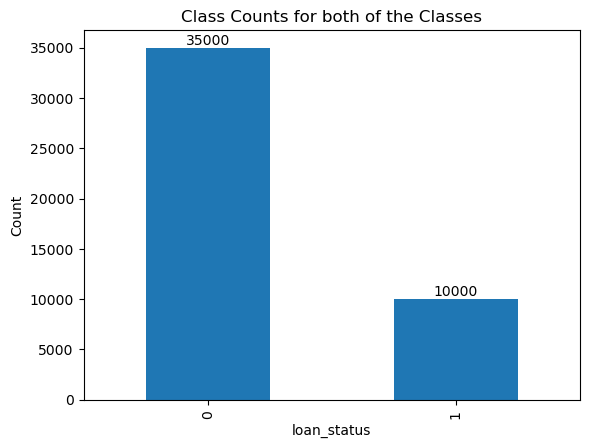

In [11]:
# TODO: Classification EDA
counts = c_y.value_counts()
ax = counts.plot(kind="bar",ylabel="Count")
ax.bar_label(ax.containers[0])
plt.title("Class Counts for both of the Classes")
plt.show()

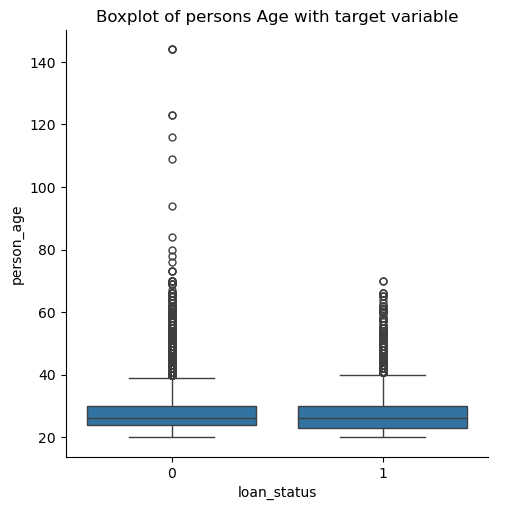

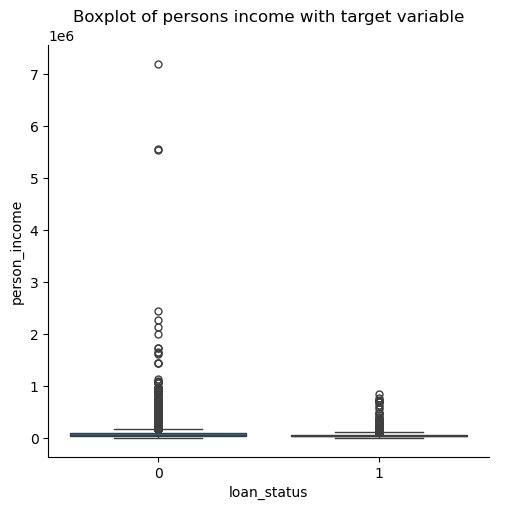

In [12]:
sns.catplot(x=c_target, y="person_age", data=c_df, kind="box", height=5)
plt.title("Boxplot of persons Age with target variable")
plt.show()
sns.catplot(x=c_target, y="person_income", data=c_df, kind="box", height=5)
plt.title("Boxplot of persons income with target variable")
plt.show()

## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [13]:
print("unique Value Counts in Education: ",c_X.person_education.value_counts())
print("unique Value Counts in Home ownership: ",c_X.person_home_ownership.value_counts())
c_df.head(5)

unique Value Counts in Education:  person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64
unique Value Counts in Home ownership:  person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [14]:
# TODO: Prepare classification features
c_X_train, c_X_test, c_y_train, c_y_test = train_test_split(
    c_X, c_y, test_size=0.2, random_state=42,stratify=c_y
)
c_ordinal_encoding = ["person_education", "person_home_ownership"]
c_ohe_encoding = [x not in c_ordinal_encoding for x in c_cat_features]

c_cat_transformer = ColumnTransformer(
    [
        (
            "ohe",
            OneHotEncoder(sparse_output=False, handle_unknown="ignore"),
            c_ohe_encoding,
        ),
        (
            "label",
            OrdinalEncoder(
                categories=[
                    ["High School", "Associate", "Bachelor", "Master", "Doctorate"],
                    ["OTHER", "RENT", "MORTGAGE", "OWN"],
                ]
            ),
            c_ordinal_encoding,
        ),
    ]
)
c_num_transformer = ColumnTransformer([("scaler", StandardScaler(), c_num_features)])
c_transformer = ColumnTransformer(
    [
        ("categorical Transformer", c_cat_transformer, c_cat_features),
        ("numerical Transformer", c_num_transformer, c_num_features),
    ]
)


## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accurac_y, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


---------------Evaluatioon For Logistic Regression Model-------------------
Train Accuracy Score:  0.8956388888888889
Test Accuracy Score:  0.8983333333333333
Classification Report (for Test only):
                precision    recall  f1-score   support

           0       0.93      0.94      0.94      7000
           1       0.78      0.75      0.77      2000

    accuracy                           0.90      9000
   macro avg       0.86      0.84      0.85      9000
weighted avg       0.90      0.90      0.90      9000

Confusion Matrix(For Test only): 
 [[6588  412]
 [ 503 1497]]


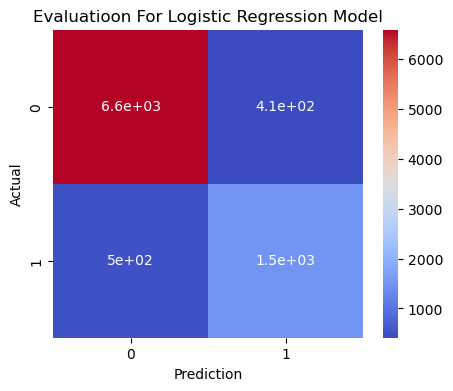

In [15]:
# TODO: Logistic Regression
log_reg = LogisticRegression(C=1.0, max_iter=1000)
log_reg_pipe = Pipeline([("transformer", c_transformer), ("ml_model", log_reg)])
log_reg_pipe.fit(c_X_train, c_y_train)
c_y_train_pred = log_reg_pipe.predict(c_X_train)
c_y_test_pred = log_reg_pipe.predict(c_X_test)


def evaluation(y_train, y_train_pred, y_test, y_test_pred, model):
    print(f"---------------Evaluatioon For {model} Model-------------------")
    train_acc_score = accuracy_score(y_train, y_train_pred)
    test_acc_score = accuracy_score(y_test, y_test_pred)
    print("Train Accuracy Score: ", train_acc_score)
    print("Test Accuracy Score: ", test_acc_score)
    print(
        "Classification Report (for Test only):\n ",
        classification_report(y_test, y_test_pred),
    )
    cm = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix(For Test only): \n", cm)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, cmap="coolwarm")
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.title(f"Evaluatioon For {model} Model")
    plt.show()


evaluation(c_y_train, c_y_train_pred, c_y_test, c_y_test_pred, "Logistic Regression")


## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


---------------Evaluatioon For Support Vector Classifier Model-------------------
Train Accuracy Score:  0.9202777777777778
Test Accuracy Score:  0.9177777777777778
Classification Report (for Test only):
                precision    recall  f1-score   support

           0       0.94      0.96      0.95      7000
           1       0.85      0.77      0.81      2000

    accuracy                           0.92      9000
   macro avg       0.89      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000

Confusion Matrix(For Test only): 
 [[6727  273]
 [ 467 1533]]


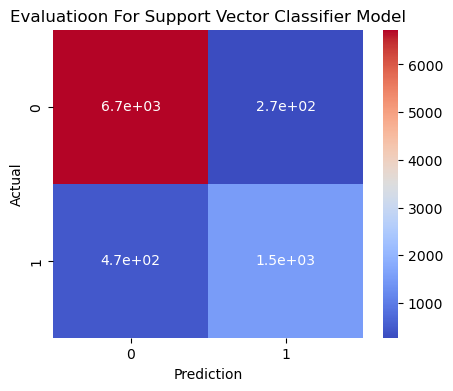

In [17]:
# TODO: SVM Classification
svm_pipe = Pipeline([
    ("transformer",c_transformer),
    ("ml_model",SVC(kernel="rbf",C = 1,gamma="scale"))
])
svm_pipe.fit(c_X_train,c_y_train)
c_y_train_pred_svm = svm_pipe.predict(c_X_train)
c_y_test_pred_svm = svm_pipe.predict(c_X_test)
evaluation(c_y_train,c_y_train_pred_svm,c_y_test,c_y_test_pred_svm,"Support Vector Classifier")

## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



---------------Evaluatioon For Naive Bias Classifier Model-------------------
Train Accuracy Score:  0.8253888888888888
Test Accuracy Score:  0.8273333333333334
Classification Report (for Test only):
                precision    recall  f1-score   support

           0       0.97      0.80      0.88      7000
           1       0.57      0.91      0.70      2000

    accuracy                           0.83      9000
   macro avg       0.77      0.86      0.79      9000
weighted avg       0.88      0.83      0.84      9000

Confusion Matrix(For Test only): 
 [[5617 1383]
 [ 171 1829]]


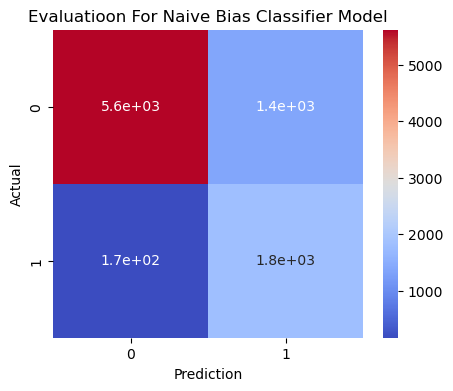

In [ ]:
# TODO: Naive Bayes
naive_pipe = Pipeline([
    ("transformer",c_transformer),
    ("ml_model",BernoulliNB())
])
naive_pipe.fit(c_X_train,c_y_train)
c_y_train_pred_naive = naive_pipe.predict(c_X_train)
c_y_test_pred_naive = naive_pipe.predict(c_X_test)
evaluation(c_y_train,c_y_train_pred_naive,c_y_test,c_y_test_pred_naive,"Naive Bias Classifier")

## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accurac_y vs K

**Marks:** Experiment (3), Plot & choice (2)


In [ ]:
# TODO: KNN
# knn_pipe = Pipeline([
#     ("transformer",c_transformer),
#     ("ml_model",)
# ])

## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


In [ ]:
# TODO: Random Forest Classifier

# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here